<a href="https://colab.research.google.com/github/ariannalangton/Portfolio/blob/main/NASA_Meteorite_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

I will be doing an analysis of meteorite landings using data from nasa.gov. The code below allows me to import the csv file from my local drive

In [ ]:

uploaded = files.upload()

Saving Meteorite_Landings.csv to Meteorite_Landings (1).csv


This now reads the file into a pandas dataframe, and then shows the first 5 rows of the data.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Meteorite_Landings (1).csv']))
df.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


As seen above, there are name, id, mass, year, and location columns which are pretty straightforward. the recclass column is the class of the meteorite, reclat and reclong are just latitude and longitude. Nametype is 'valid' for most meteorites and 'relict' are for objects that were once meteorites but are now highly altered by weathering on Earth. The fall column has two types, fell and found.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


Used .info() to get the total count of rows and columns, as well as if there were any null rows. We can see that 6,7,8,9 are less than the first 5, so there are some null values to be dealt with. Also, our year is saved as a float instead of a datetime data type.

In [ ]:
df.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


.describe() just gives a nice idea of what kind of data spread we are looking at.

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
45711,False
45712,False
45713,False
45714,False


Now, I want to structure my data by dropping an duplicates and extracting any nulls.

In [ ]:
df.drop_duplicates()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


After dropping duplicates from the df, the amount of rows stayed the same, meaning there are not any duplicates.

In [ ]:
df.isna().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),131
fall,0
year,291
reclat,7315
reclong,7315
GeoLocation,7315


this tells us how many null valures there are in each row. Lets extract our nulls before moving further.

In [ ]:
df.isna()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
45711,False,False,False,False,False,False,False,False,False,False
45712,False,False,False,False,False,False,False,False,False,False
45713,False,False,False,False,False,False,False,False,False,False
45714,False,False,False,False,False,False,False,False,False,False


.insa() creates a table that will say true when a cell is null.

We are going to create a mask of this table so that way we can create a dataframe of just rows with null values by extracting rows that have atleast one true value (null).

In [ ]:
mask = df.isna()
mask.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,False,False,False,False,False,False,False,False,False,False
45712,False,False,False,False,False,False,False,False,False,False
45713,False,False,False,False,False,False,False,False,False,False
45714,False,False,False,False,False,False,False,False,False,False
45715,False,False,False,False,False,False,False,False,False,False


Tail just shows the end of the mask

In [ ]:
mask = mask.any(axis=1)
mask.head()

,0
0,False
1,False
2,False
3,False
4,False


I use.any() it will be true if there is even one true (null) value on the axis we chose. I chose axis 1, which will scan my rows for any true values, or null values. Now our mask is only true for the rows that have nulls. Now that mask is a series of boolean values, I will use it as a boolean mask to extract only true rows.

In [ ]:
df_missing_rows = df[mask]
df_missing_rows

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.33333, -64.86667)"
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930.0,27.00000,-99.00000,"(27.0, -99.0)"


I created a new date frame called df_missing_rows by applying my boolean mask to the original data frame. Now we have a dataframe of just the rows that contain atleast one null value.

 Lets convert our year to a datetime and format it.

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,years_since_1970
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)",-90.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)",-19.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)",-18.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)",6.0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)",-68.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              45716 non-null  object        
 1   id                45716 non-null  int64         
 2   nametype          45716 non-null  object        
 3   recclass          45716 non-null  object        
 4   mass (g)          45585 non-null  float64       
 5   fall              45716 non-null  object        
 6   year              45404 non-null  datetime64[ns]
 7   reclat            38401 non-null  float64       
 8   reclong           38401 non-null  float64       
 9   GeoLocation       38401 non-null  object        
 10  years_since_1970  45425 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 3.8+ MB


In [ ]:
df['year'] = df.year.isocalender().year
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,years_since_1970
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",-90.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",-19.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",-18.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",6.0
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",-68.0


going to rename my lattitude and longitude columns for clarity

In [ ]:
df.rename(columns={'reclat': 'latitude'}, inplace=True)
df.rename(columns={'reclong': 'longitude'}, inplace=True)

In [ ]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,years_since_1970
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",-90.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",-19.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",-18.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",6.0
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",-68.0


Now that i have my df formatted like i want, i am going to drop my null rows. this is just one option that can be used when you encounter null data, for exmaple another is imputing them with other values. Since this project is purely educational and i saved a table of just the null data, i will drop the nulls.

In [ ]:
df = df.dropna()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,years_since_1970
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",-90.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",-19.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",-18.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",6.0
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",-68.0


In [ ]:
df.shape

(38101, 11)

Using shape, we can see there are still 38,000 rows of data for me to play around with.

In [ ]:
import seaborn as sns

In [ ]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,years_since_1970,year_count
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",-90.0,<NA>
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",-19.0,<NA>
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",-18.0,<NA>
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",6.0,<NA>
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",-68.0,<NA>


In [ ]:
df = df.drop(columns='year_count')

In [ ]:
df = df.drop(columns='years_since_1970')

dropped unneccessary columns i made earlier

In [ ]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
year_counts = df.year.value_counts()

creating a variable that counts the number of meteorites per year, sorted desc

In [ ]:
year_counts.head()

,count
year,
1998,3739
1987,3209
1979,3045
2009,2501
2003,1754


now we have the years with most meteorites.

In [ ]:
year_counts.head(20)

,count
year,
1998,3739
1987,3209
1979,3045
2009,2501
2003,1754
2005,1616
1990,1506
1997,1505
1999,1502


I need the value of 20th count so i can make a mask

In [ ]:
df['year_count'] = df['year'].map(year_counts)

I map the year count to year so i can create a column for each year in the df

In [ ]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,year_count
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",23
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",19
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",17
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",470
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",12


In [ ]:
df_top20_years_meteorites = df[df['year_count'] > 693]
df_top20_years_meteorites.head()
df_top20_years_meteorites.year.value_counts()

,count
year,
1998,3739
1987,3209
1979,3045
2009,2501
2003,1754
2005,1616
1990,1506
1997,1505
1999,1502


created a df of just the top 20 years by using the mask, now going to plot using seaborn

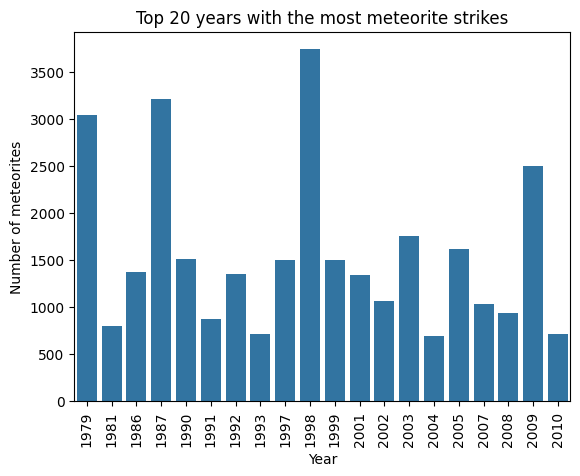

In [ ]:
sns.barplot(data=df_top20_years_meteorites,
            y='year_count',
            x='year')
plt.title('Top 20 years with the most meteorite strikes')
plt.xlabel('Year')
plt.ylabel('Number of meteorites')
plt.xticks(rotation=90)
plt.show();

Now I want to make a map of the places where meteorites land the most.

In [ ]:
df.GeoLocation.value_counts()

,count
GeoLocation,
"(0.0, 0.0)",6186
"(-71.5, 35.66667)",4760
"(-84.0, 168.0)",3040
"(-72.0, 26.0)",1505
"(-79.68333, 159.75)",657
...,...
"(-76.32167, 157.18361)",1
"(-76.32861, 157.22306)",1
"(-76.28833, 157.19195)",1


In [ ]:
Location_counts = df.GeoLocation.value_counts()

Create a variable to store the counts of each geo location.

In [ ]:
df['geo_count'] = df['GeoLocation'].map(Location_counts)

I map the geo count to location so i can create a column for each location in the df.

In [ ]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,year_count,geo_count
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",23,1
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",19,1
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",17,1
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",470,1
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",12,1


In [ ]:
import plotly.express as px
fig = px.scatter_geo(df,  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="geo_count") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Global Meteorites', # Create a Title
)

fig.show()

Lets cut this down to the top 20 locations and graph it.

In [ ]:
Location_counts.head(20)

,count
GeoLocation,
"(0.0, 0.0)",6186
"(-71.5, 35.66667)",4760
"(-84.0, 168.0)",3040
"(-72.0, 26.0)",1505
"(-79.68333, 159.75)",657
"(-76.71667, 159.66667)",637
"(-76.18333, 157.16667)",539
"(-79.68333, 155.75)",473
"(-84.21667, 160.5)",263


Getting our lowest value for the 20th location so I can use a mask.

In [ ]:
df_top20_geolocs_meteorites = df[df['geo_count'] > 33]
df_top20_geolocs_meteorites.head()


,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,year_count,geo_count
597,Mason Gully,53653,Valid,H5,24.54,Fell,2009,0.0,0.0,"(0.0, 0.0)",2501,6186
1655,Allan Hills 09004,52119,Valid,Howardite,221.70,Found,2009,0.0,0.0,"(0.0, 0.0)",2501,6186
1656,Allan Hills 09005,55797,Valid,L5,122.30,Found,2009,0.0,0.0,"(0.0, 0.0)",2501,6186
1657,Allan Hills 09006,55798,Valid,H5,104.30,Found,2009,0.0,0.0,"(0.0, 0.0)",2501,6186
1658,Allan Hills 09008,55799,Valid,H5,31.30,Found,2009,0.0,0.0,"(0.0, 0.0)",2501,6186


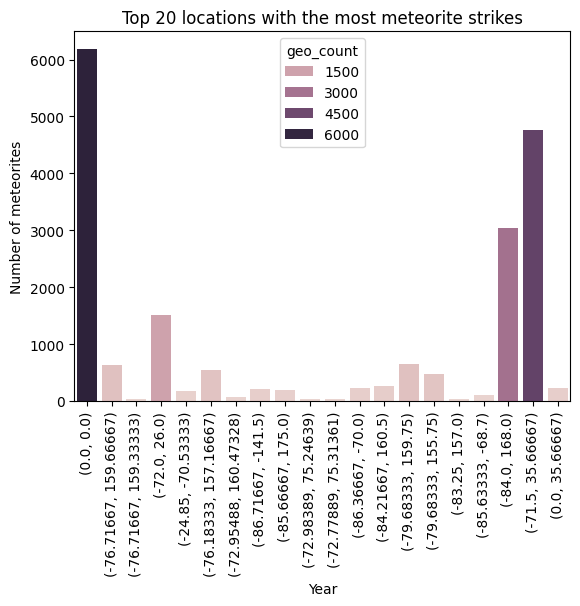

In [ ]:
sns.barplot(data=df_top20_geolocs_meteorites,
            y='geo_count',
            x='GeoLocation',
            hue = 'geo_count')
plt.title('Top 20 locations with the most meteorite strikes')
plt.xlabel('Year')
plt.ylabel('Number of meteorites')
plt.xticks(rotation=90)
plt.show();

In [ ]:
fig = px.scatter_geo(df_top20_geolocs_meteorites,  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="geo_count", # Set to plot size as number of strikes
                    color = "GeoLocation", # Set to color as location
                    title = "Top 20 locations with the most meteorite strikes") # Create a Title
fig.show()

In [ ]:
fig = sns.heatmap(df.corr(), annot=True)

Lets look at the average mass of all of the data.

In [ ]:
average = df['mass (g)'].mean()
average

14020.82279835175

I want to find the average mass by year.

In [ ]:
average_mass_by_year = df.groupby('year')['mass (g)'].mean()

Creating a new column by mapping the average mass to the year.

In [ ]:
df_top20_years_meteorites['avg_mass'] = df_top20_years_meteorites['year'].map(average_mass_by_year)

<ipython-input-203-53403f06beff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_top20_years_meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,year_count,avg_mass
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981,39.91667,42.81667,"(39.91667, 42.81667)",802,2996.414501
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001,13.66033,28.96000,"(13.66033, 28.96)",1339,701.111613
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002,45.82133,6.01533,"(45.82133, 6.01533)",1066,1691.566698
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008,20.74575,32.41275,"(20.74575, 32.41275)",936,1509.977049
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009,31.80500,-97.01000,"(31.805, -97.01)",2501,1165.644574


Plot the averager meteorite mass by year.

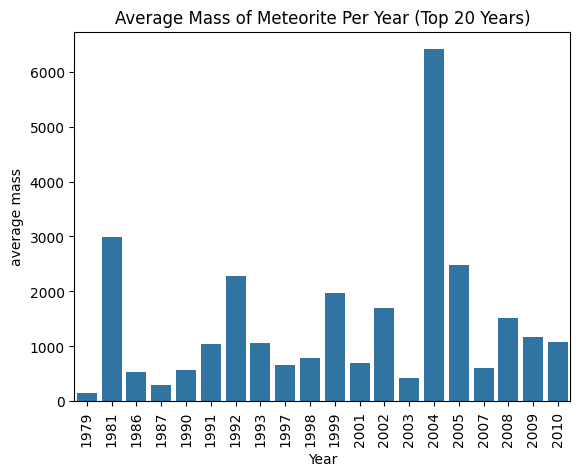

In [ ]:
sns.barplot(data=df_top20_years_meteorites,
            y='avg_mass',
            x='year')
plt.title('Average Mass of Meteorite Per Year (Top 20 Years)')
plt.xlabel('Year')
plt.ylabel('average mass')
plt.xticks(rotation=90)
plt.show();

Finally, I want to look at the average mass by type of meteorite.

In [ ]:
average_mass_by_reclass = df.groupby('recclass')['mass (g)'].mean()

In [ ]:
average_mass_by_reclass.head()

,mass (g)
recclass,
Acapulcoite,206.297784
Acapulcoite/Lodranite,25.352000
Acapulcoite/lodranite,3.500000
Achondrite-prim,747.666667
Achondrite-ung,728.538889


We can see the types of meteorite and their average mass, lets get the top 20 and plot them. First we will map our class to the average mass.

In [ ]:
df['average_mass_recclass'] = df['recclass'].map(average_mass_by_reclass)
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,year_count,geo_count,avg_mass,average_mass_recclass
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",23,1,2.459874e+04,2454.146641
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",19,1,7.612742e+04,948.503867
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",17,1,5.263746e+04,8154.645882
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",470,1,1.726234e+04,206.297784
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",12,1,1.313087e+06,1516.318848


In [ ]:
recclass_counts = df.recclass.value_counts()
recclass_counts.head(20)

,count
recclass,
L6,7518
H5,6243
H6,3897
H4,3880
L5,3264
LL5,2199
LL6,1659
L4,939
H4/5,395


Getting the top 20 value of class for the mask.

In [ ]:
df['class_count'] = df['recclass'].map(recclass_counts)
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation,year_count,geo_count,avg_mass,average_mass_recclass,class_count
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",23,1,2.459874e+04,2454.146641,3264
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",19,1,7.612742e+04,948.503867,3897
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",17,1,5.263746e+04,8154.645882,17
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",470,1,1.726234e+04,206.297784,37
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",12,1,1.313087e+06,1516.318848,7518


In [ ]:
df_top_20_class = df[df['class_count']>178]

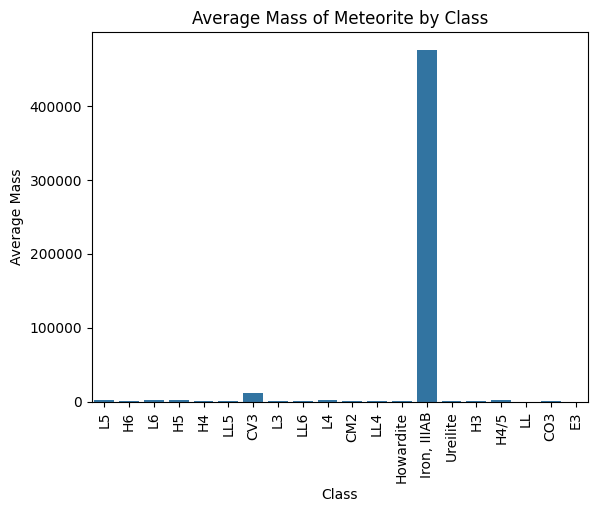

In [ ]:
sns.barplot(data=df_top_20_class,
            y='average_mass_recclass',
            x='recclass')
plt.title('Average Mass of Meteorite by Class')
plt.xlabel('Class')
plt.ylabel('Average Mass')
plt.xticks(rotation=90)
plt.show();

I only see one big on, so I want to do it by top 20 mass now instead of most popular class. It seems the most popular classes are small besides Iron, IIIAB, so lets see what classes are the largest.

In [ ]:
average_mass_by_reclass.sort_values(ascending=False).head(21)

,mass (g)
recclass,
"Iron, IVB",4.322833e+06
"Iron, IIIE",2.224277e+06
"Iron, IC",8.925563e+05
"Iron, IAB-MG",7.355450e+05
"Iron, IAB-ung",7.335906e+05
Mesosiderite-A1,6.982063e+05
"Pallasite, PMG-an",6.853589e+05
"Iron, IVA",4.921797e+05
"Iron, IIIAB",4.758229e+05


In [ ]:
df_top_20_mass = df[df['average_mass_recclass']>6.522493e+04]

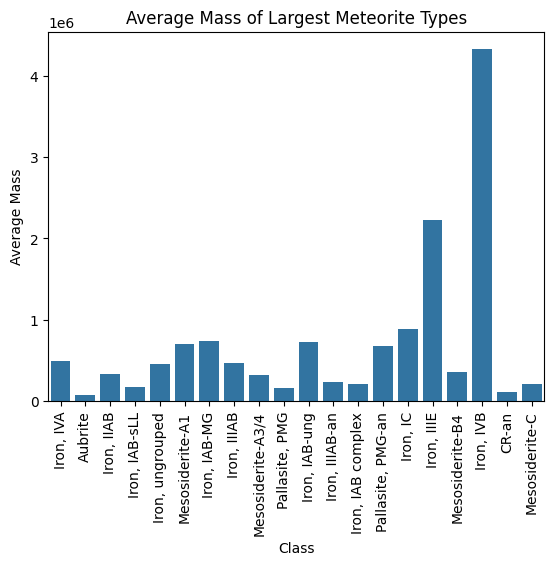

In [ ]:
sns.barplot(data=df_top_20_mass,
            y='average_mass_recclass',
            x='recclass')
plt.title('Average Mass of Largest Meteorite Types')
plt.xlabel('Class')
plt.ylabel('Average Mass')
plt.xticks(rotation=90)
plt.show();

We can see the largest types are both Iron, and the others are pretty small in comparison. Now, lets look more into our missing data we extracted.

In [ ]:
df_missing_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7601 entries, 12 to 45700
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7601 non-null   object 
 1   id           7601 non-null   int64  
 2   nametype     7601 non-null   object 
 3   recclass     7601 non-null   object 
 4   mass (g)     7470 non-null   float64
 5   fall         7601 non-null   object 
 6   year         7310 non-null   float64
 7   latitude     286 non-null    float64
 8   longitude    286 non-null    float64
 9   GeoLocation  286 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 653.2+ KB


we can see name, id, nametype, class all have no null values. lets do some investigating of our nulls since we went over our primary data.

In [ ]:
df_missing_rows['nametype'].value_counts()

,count
nametype,
Valid,7547
Relict,54


from the nasa webpage, Under NameType, 'valid' is for most meteorites and 'relict' are for objects that were once meteorites but are now highly altered by weathering on Earth. We can see there are more valid types that are null, but could be because there are more valid overall. Lets check.

In [ ]:
df_missing_rows['recclass'].value_counts()

,count
recclass,
L5,1532
H5,899
L6,766
H6,630
LL5,567
...,...
L/LL~6,1
L(LL)~4,1
LL~4/5,1


The type with the most null values is L5, followed by H5 and L6. L6 is the top in the primarym data, and H5 and L5 are up there, so it is likely these are just the most popular types overall and doesn't correlate to why the data is mising.

In [ ]:
df['nametype'].value_counts()

,count
nametype,
Valid,38080
Relict,21


Hypthesis was true, there are overall less relict so it makes sense there are also less for the null rows.

In [ ]:
df_missing_rows['year'].value_counts()

,count
year,
2004.0,1574
2003.0,1569
2002.0,1012
2006.0,840
1998.0,550
...,...
1896.0,1
1948.0,1
1909.0,1


the most missing data was from the year 2004, cloesly followed by 2003. Possible there was some type of error in the recording systems those years.

In [ ]:
df_missing_rows['GeoLocation'].value_counts()

,count
GeoLocation,
"(58.58333, 13.43333)",47
"(0.0, 0.0)",28
"(27.16667, -9.5)",3
"(32.05, -3.03333)",3
"(19.82361, 56.44056)",2
...,...
"(31.61111, -99.90417)",1
"(29.31667, 31.28333)",1
"(32.4, 105.9)",1


In [ ]:
average_missing = df_missing_rows['mass (g)'].mean()
average_missing

1427.0841898259703

the average mass for the primary data is 14020.82279835175, which is much bigger than the average mass of the missing meteroites. Its possible these were too small to be properly located. Lets look at their location on a map.

In [ ]:
Location_counts_missing = df_missing_rows.GeoLocation.value_counts()
df_missing_rows['geo_count'] = df_missing_rows['GeoLocation'].map(Location_counts_missing)

In [ ]:
fig = px.scatter_geo(df_missing_rows,  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="geo_count", # Set to plot size as number of strikes
                    color = "GeoLocation", # Set to color as location
                    title = "Missing Locations") # Create a Title
fig.show()

The most significant one missing would be the blue location at (58.58, 13.4) since that is not on our top 20 geo location map, but the count there is 47, which ic greater than our min threshold mask of 33, so this location would be inlcuded in our top 20. The other large red one at (0.0, 0.0) is large on the other map as well, so it does not skew the results much. Also, that one is in the water, so it is likely hard to track those.